## Loading yt-napari Layers

The `yt_napari` plugin comes with some helper functions to uniformly sample yt datasets and add them to an active napari viewer from a notebook. To get started, initialize an empty `napari.Viewer` and load in a `yt` dataset:

In [1]:
import napari
import yt

In [2]:
viewer = napari.Viewer()

In [3]:
ds = yt.load("IsolatedGalaxy/galaxy0030/galaxy0030")

yt : [INFO     ] 2024-08-28 09:43:36,644 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2024-08-28 09:43:36,644 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-08-28 09:43:36,645 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-28 09:43:36,645 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-08-28 09:43:36,645 Parameters: cosmological_simulation   = 0


To add data to `napari`, we need to create a new image layer. When working with generic array data, you can do this with the `viewer.add_image` function. Since `napari` works in pixel coordinates, `yt_napari` has a helper `Scene` container that can be used to sample a dataset and add it to an active viewer. To use it, first instantiate an empty `Scene`:

In [4]:
from yt_napari.viewer import Scene
yt_scene = Scene()

The new `yt_scene` object will have a method, `add_region` that will uniformly sample the dataset within a rectalinear region and add the new sample to the viewer:

In [5]:
left_edge = ds.domain_center - ds.arr([40, 40, 40], 'kpc')
right_edge = ds.domain_center + ds.arr([40, 40, 40], 'kpc')
res = (600, 600, 600)

yt_scene.add_region(viewer,
                    ds,
                    ("enzo", "Temperature"),
                    left_edge = left_edge,
                    right_edge = right_edge,
                    resolution= res)

yt_scene.add_region(viewer,
                    ds,
                    ("enzo", "Density"),
                    left_edge = left_edge,
                    right_edge = right_edge,
                    resolution = res)

Parsing Hierarchy : 100%|██████████████████████████████████████████████████████████| 173/173 [00:00<00:00, 31087.55it/s]
yt : [INFO     ] 2024-08-28 09:43:36,691 Gathering a field list (this may take a moment.)


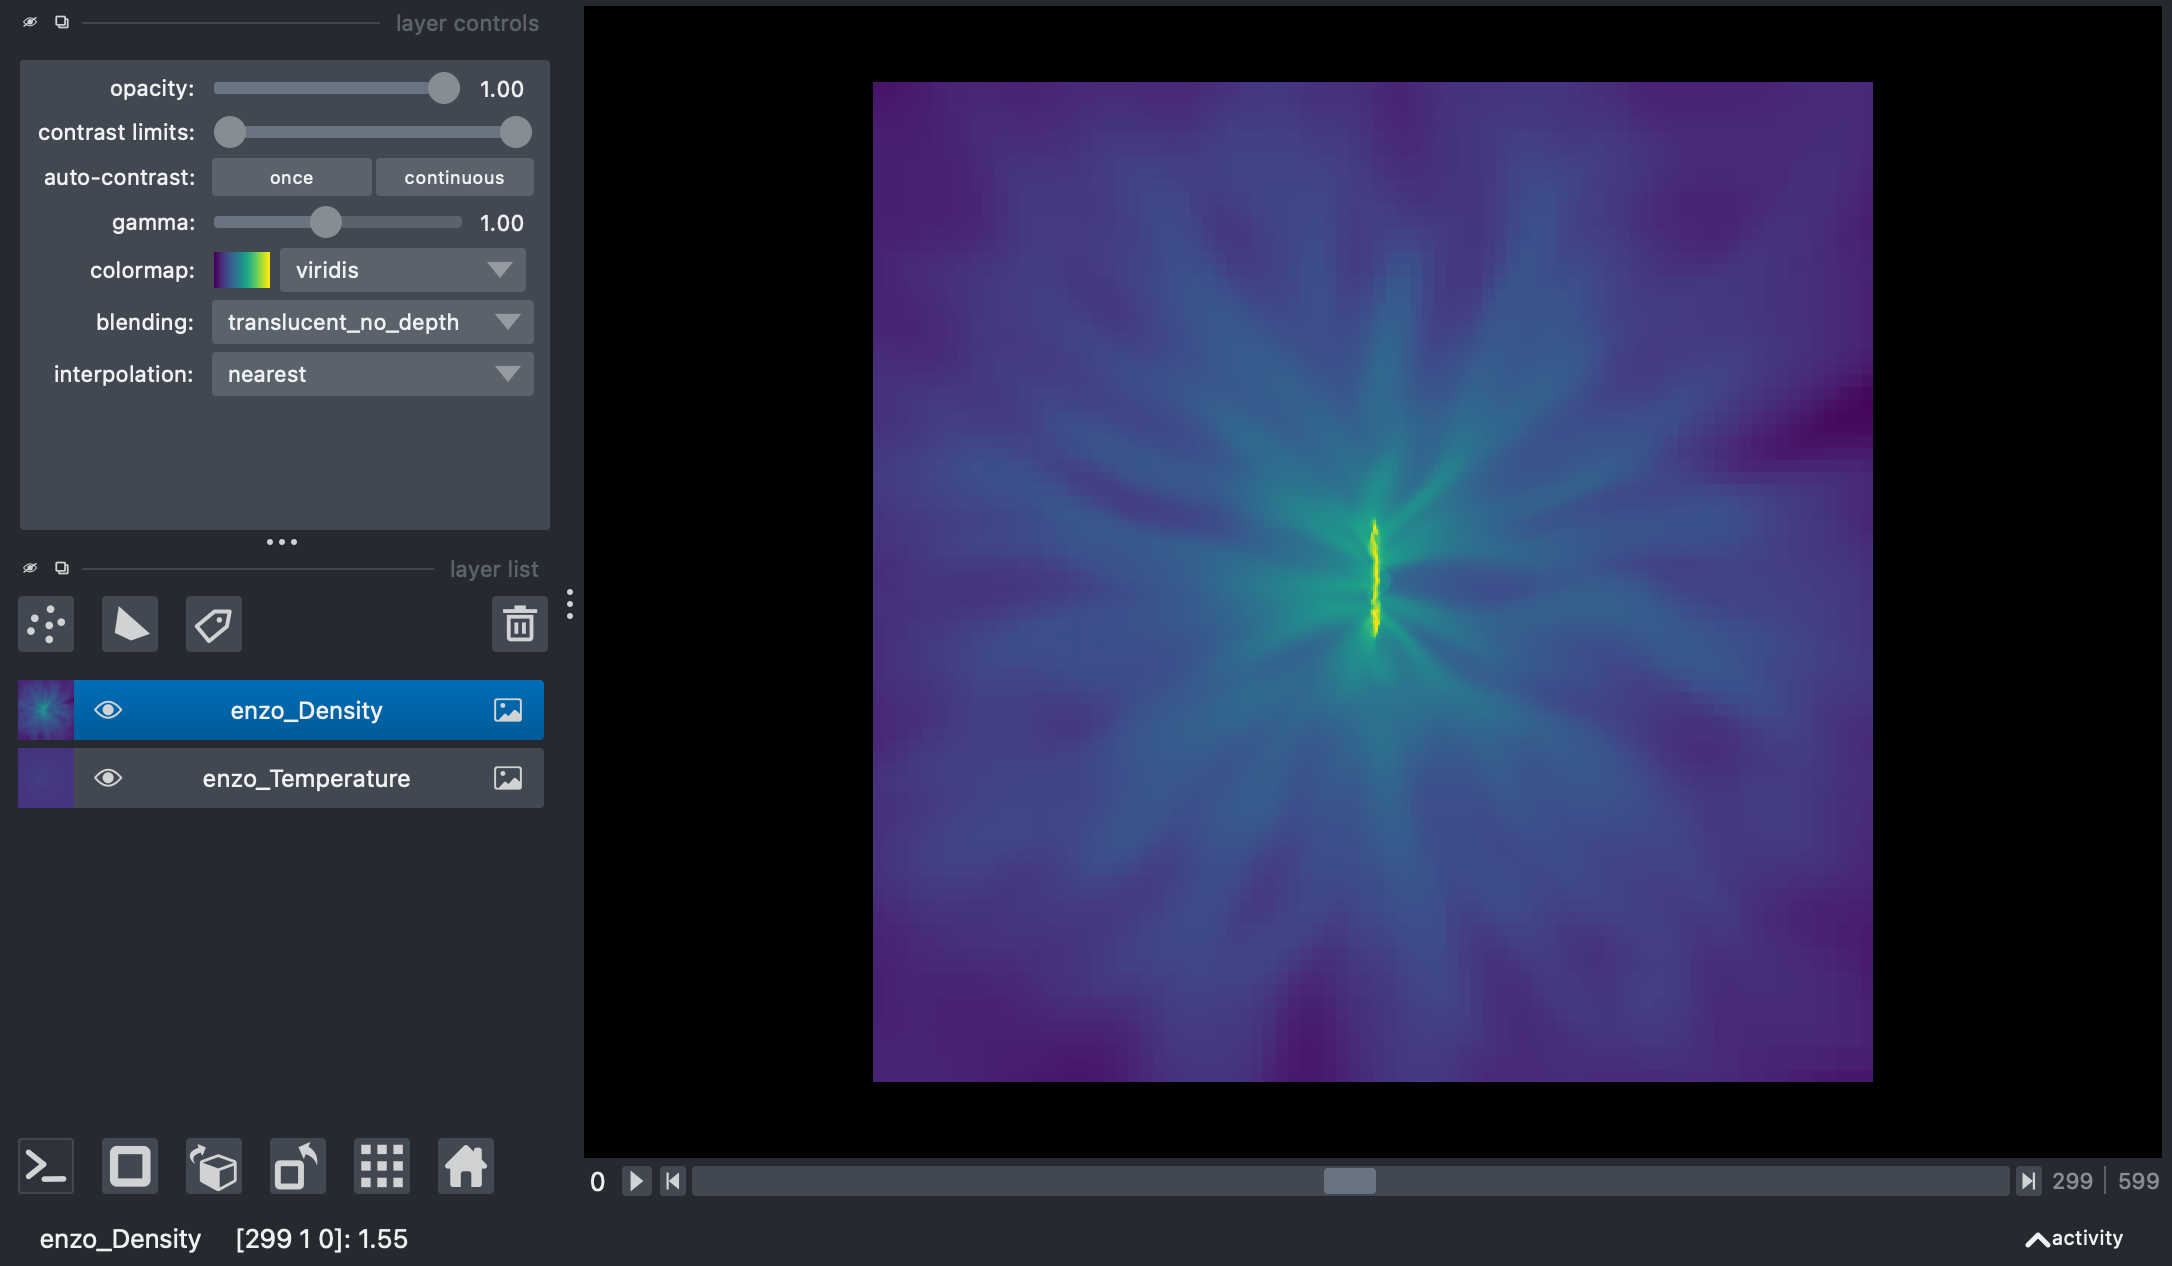

In [6]:
from napari.utils import nbscreenshot
nbscreenshot(viewer)

Now if we add another layer covering a different extent and at a different resolution, it will be properly scaled and translated so that it aligns with the existing layers:

In [7]:
left_edge = ds.domain_center - ds.arr([20, 20, 20], 'kpc')
right_edge = ds.domain_center + ds.arr([10, 10, 10], 'kpc')
yt_scene.add_region(viewer,
                    ds,
                    ("enzo", "TotalEnergy"),
                    left_edge = left_edge,
                    right_edge = right_edge,
                    resolution=(200, 200, 200))

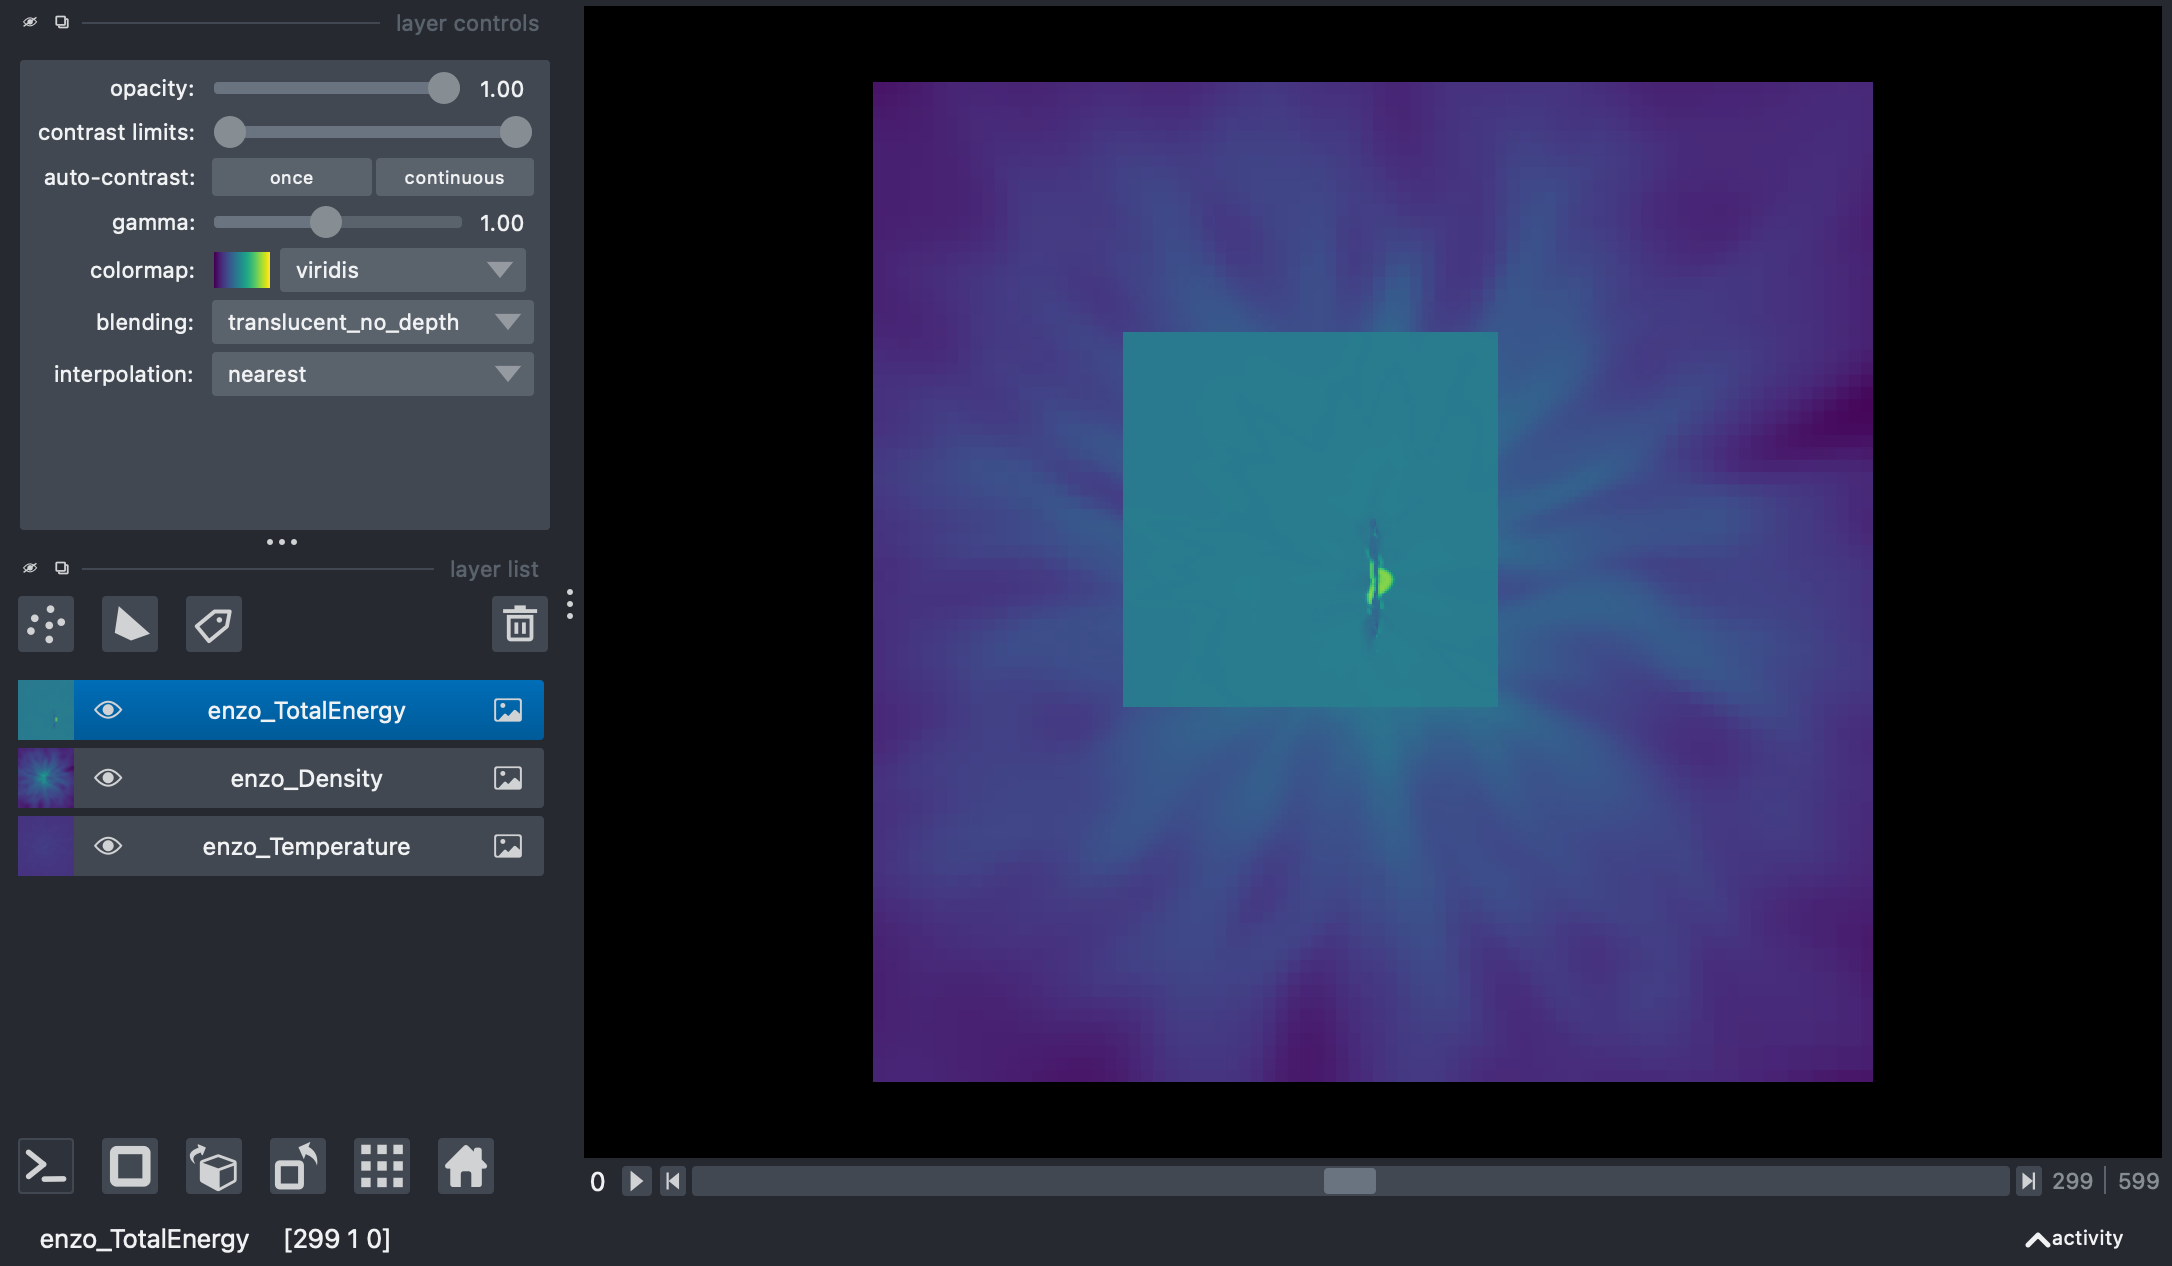

In [8]:
from napari.utils import nbscreenshot
nbscreenshot(viewer)

The `add_region` method also accepts any keyword argument that `viewer.add_image` accepts, so that you can also control, for example, the colormap, contrast limits (the colormap limits) and opacity of a layer:

In [9]:
viewer.layers.clear() # first clear existing layers

In [10]:
left_edge = ds.domain_center - ds.arr([10, 10, 10], 'kpc')
right_edge = ds.domain_center + ds.arr([10, 10, 10], 'kpc')
yt_scene.add_region(viewer,
                    ds,
                    ("enzo", "Density"),
                    left_edge = left_edge,
                    right_edge = right_edge,                       
                    resolution=(600, 600, 600),
                    colormap="magma",
                    contrast_limits=(3.4, 6.4))

yt_scene.add_region(viewer,
                    ds,
                    ("enzo", "Temperature"),
                    left_edge = left_edge,
                    right_edge = right_edge,                       
                    resolution=(300, 300, 300),
                    colormap="yellow",
                    contrast_limits=(4., 6.),
                    opacity=0.6)

In [11]:
viewer.dims.ndisplay = 3 # switch to 3d dispaly 

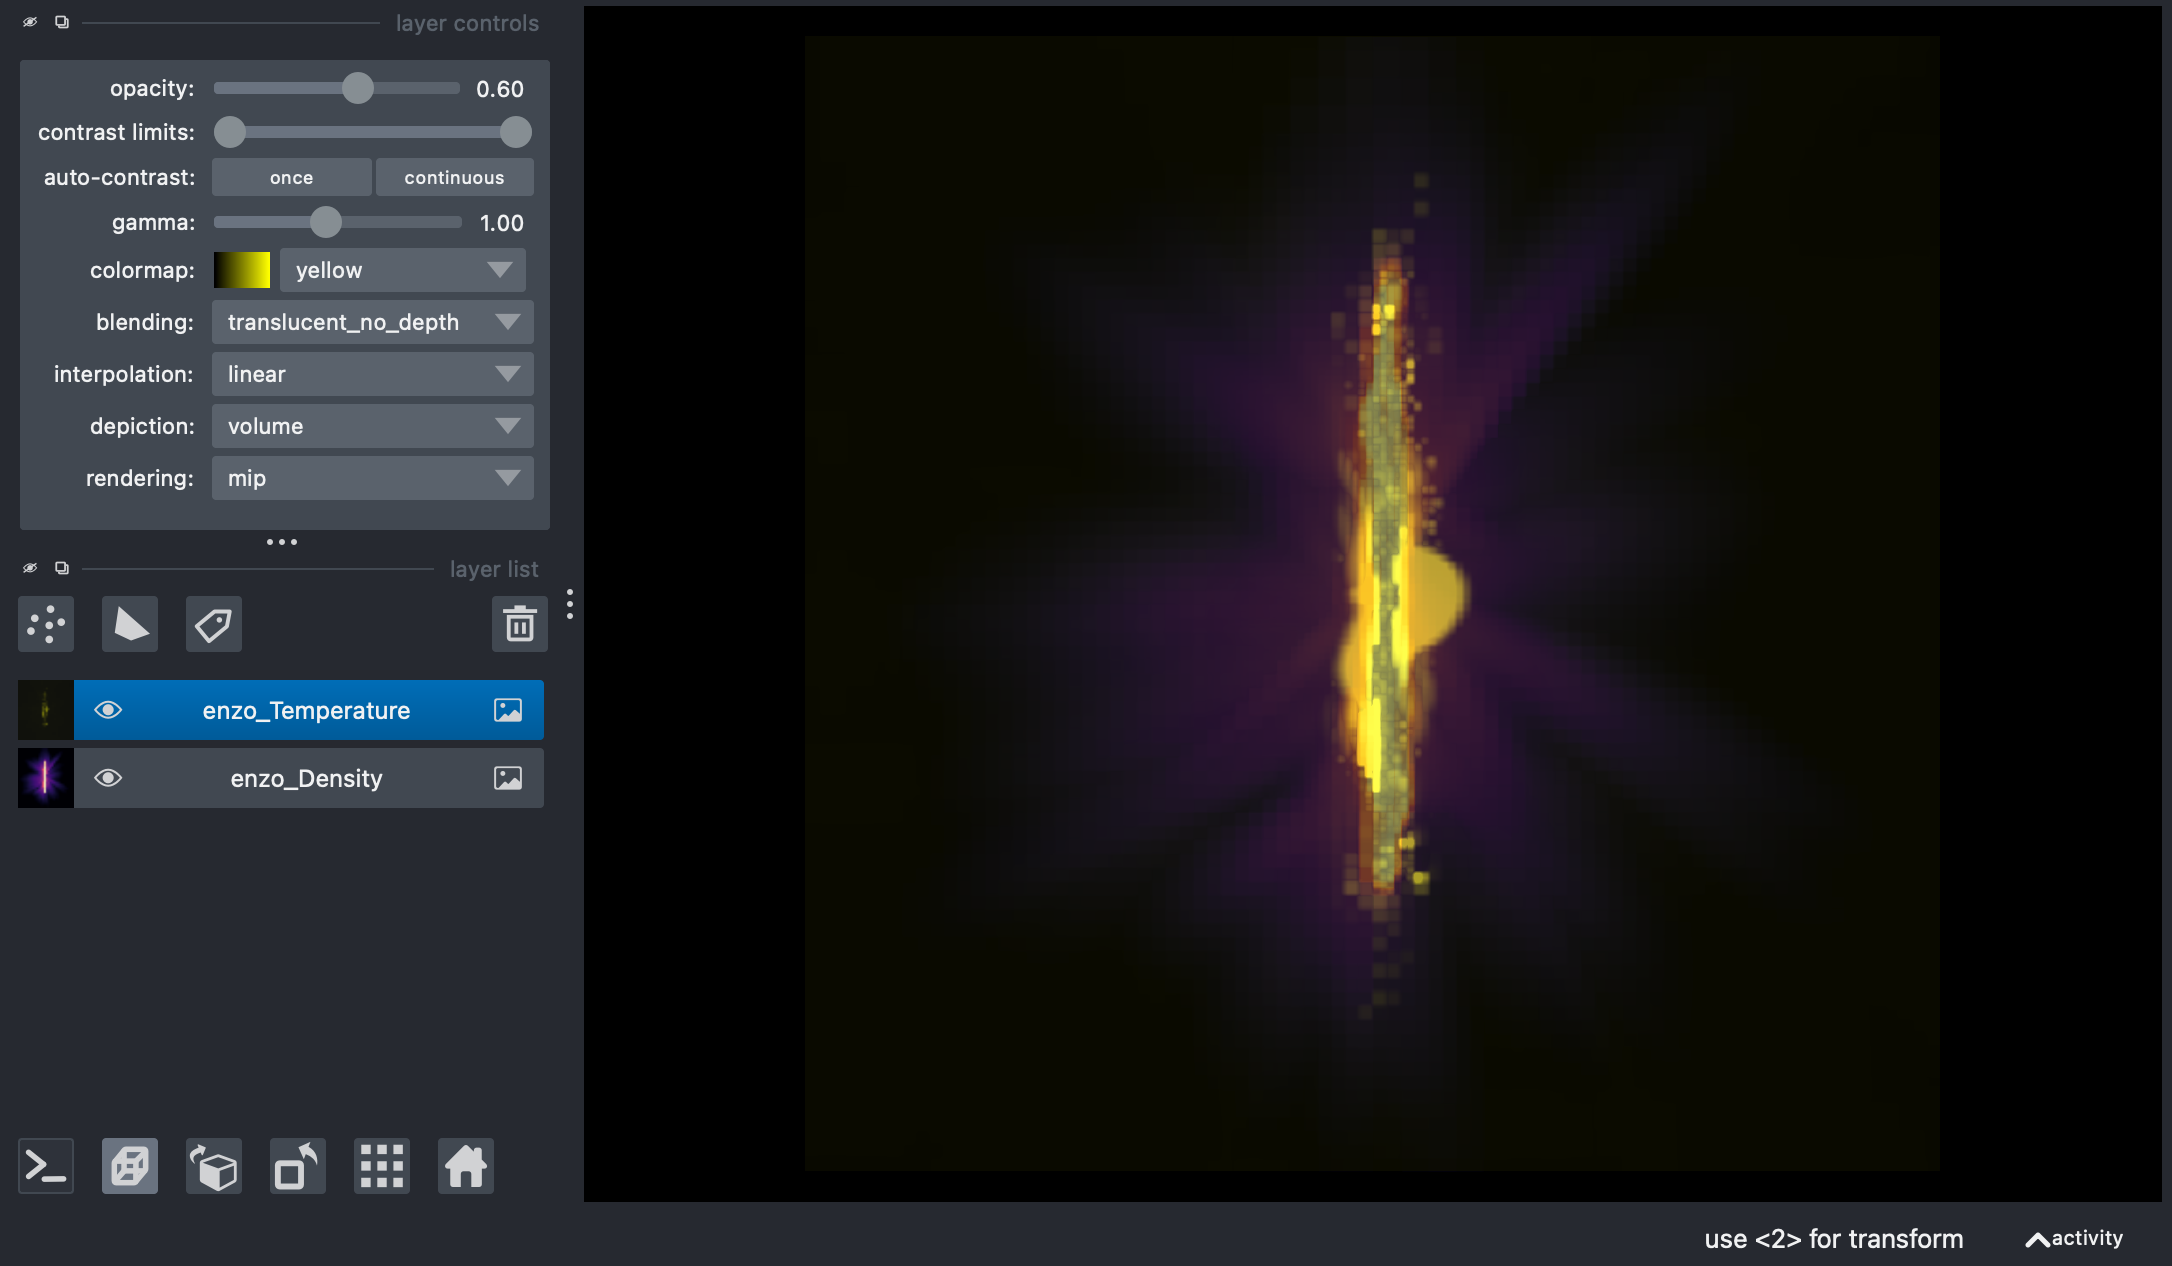

In [12]:
from napari.utils import nbscreenshot
nbscreenshot(viewer)

In addition to 3D regions, you can also load [Covering Grids](https://yt-project.org/doc/reference/api/yt.data_objects.construction_data_containers.html#yt.data_objects.construction_data_containers.YTCoveringGrid). 

Unlike the base `YTCoveringGrid`, here you specify both left and right edges and the dimensions will be calculated for the level you specify. Since we're using a divergence field here, we specifiy `num_ghost_zones=1`. The contrast limits are chosen to highlight the one region of strong positive divergence:

In [13]:
yt_scene.add_covering_grid(viewer, ds, ('gas', 'velocity_divergence'), 
                           left_edge = ds.domain_center - ds.quan(0.0075, 'code_length'),
                           right_edge = ds.domain_center + ds.quan(0.0075, 'code_length'),
                           level = 8, 
                           num_ghost_zones=1, take_log=False,
                           contrast_limits = (0.000000000000033, 0.000000000000204), 
                           colormap='cyan',)

In [14]:
cam_dict = {"center": [299.25, 299.25, 299.25], 
            "zoom": 1.9292299290000003, 
            "angles": [96.23211782317102, 14.5372135548309, 104.6325305851072],
            "perspective": 0.0, "mouse_pan": True, "mouse_zoom": True}

viewer.camera.update(cam_dict)
viewer.layers[0].visible = False

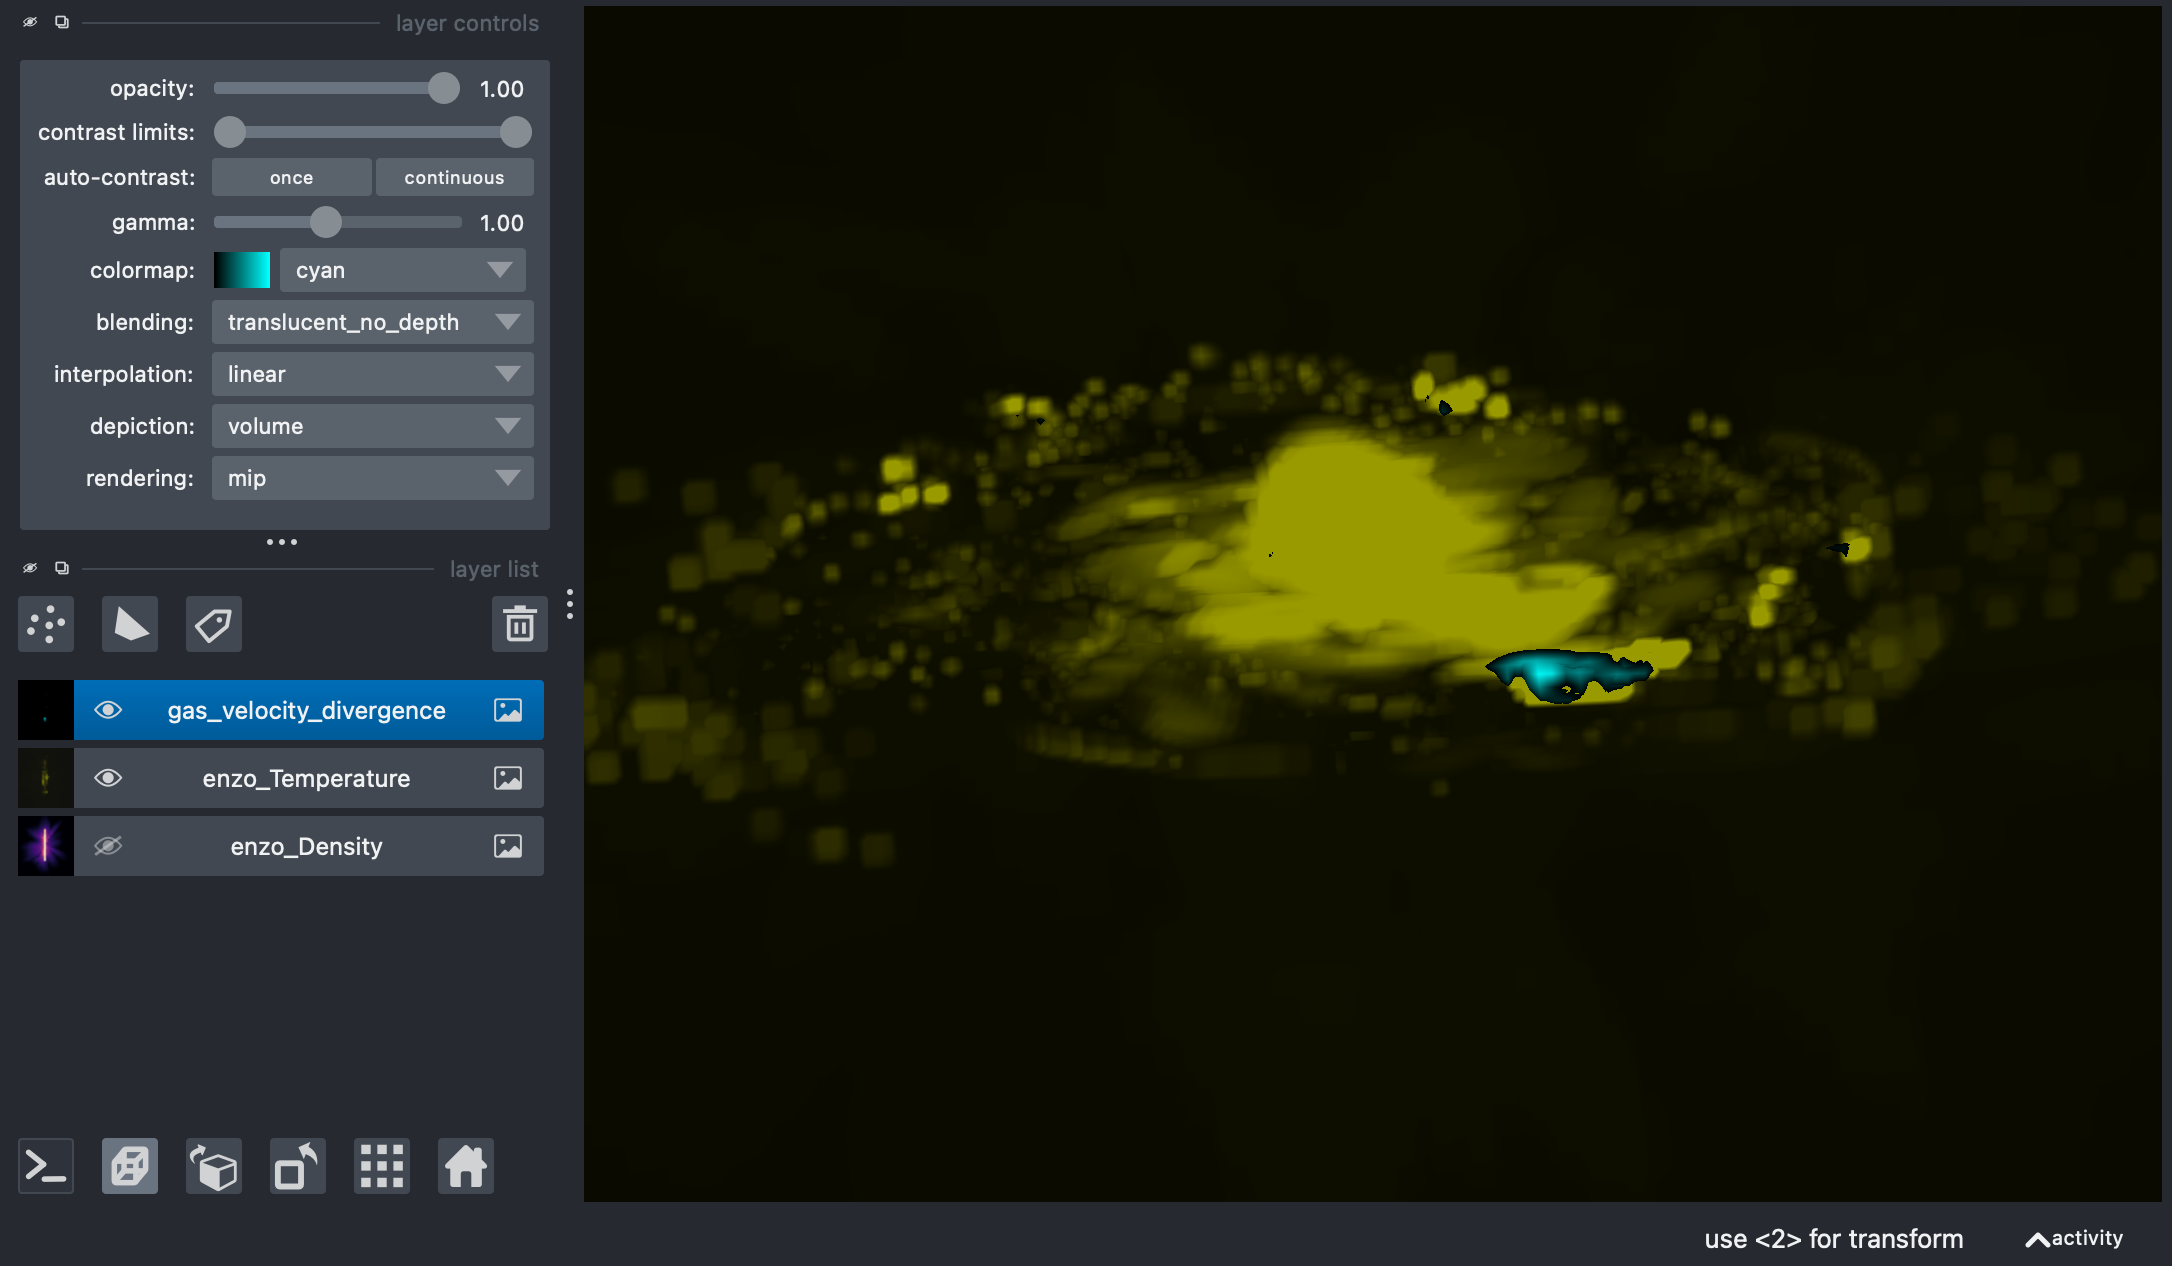

In [15]:
nbscreenshot(viewer)